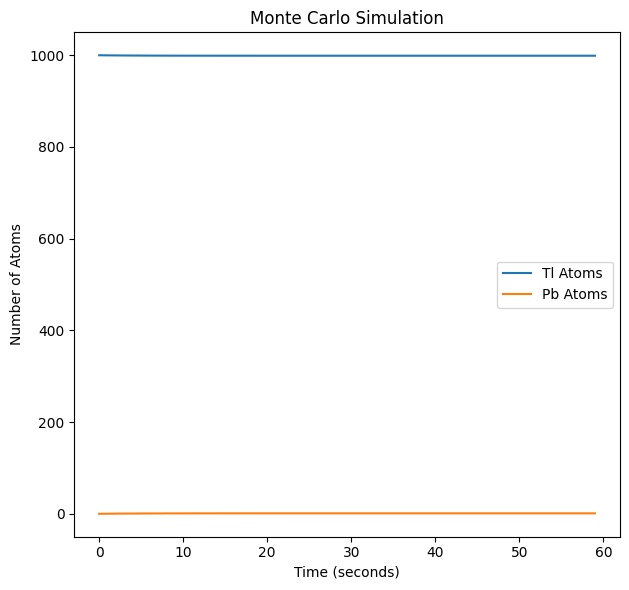

In [1]:
# exercise 11 PART ONE.markdown


import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Constants
tau = 3.052  # half-life in minutes
total_time = 60  # total simulation time in seconds
num_atoms = 1000

# Monte Carlo simulation
tl_atoms_monte_carlo = np.ones((num_atoms, total_time)) * 1000
pb_atoms_monte_carlo = np.zeros((num_atoms, total_time))

for t in range(total_time):
    decay_prob = 1 - pow(2, -t / tau)
    decayed_atoms = np.random.rand(num_atoms) < decay_prob

    tl_atoms_monte_carlo[:, t] -= decayed_atoms
    pb_atoms_monte_carlo[:, t] += decayed_atoms

# Plotting
plt.figure(figsize=(12, 6))

# Monte Carlo Method Plot
plt.subplot(1, 2, 1)
plt.plot(range(total_time), np.mean(tl_atoms_monte_carlo, axis=0), label='Tl Atoms')
plt.plot(range(total_time), np.mean(pb_atoms_monte_carlo, axis=0), label='Pb Atoms')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.title('Monte Carlo Simulation')
plt.legend()

plt.tight_layout()
plt.show()

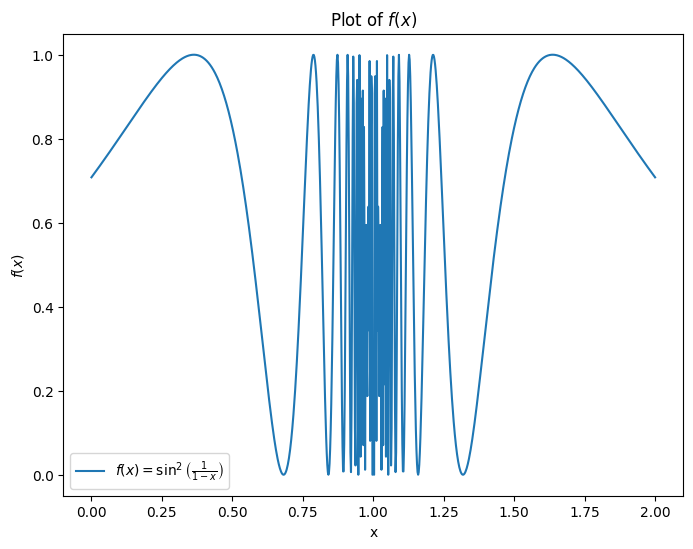

Hit/Miss Method:
Integral Estimate: 1.3506, Error Estimate: 0.0

Mean Value Method:
Integral Estimate: 1.3457181666212723, Error Estimate: 0.006084655518747773


In [2]:
# exercise 11 PART TWO.Monte Carlo integration: hit/miss vs mean value method


import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Function to integrate
def f(x):
    return np.sin(1 / (1 - x))**2

# Plot the function
x_vals = np.linspace(0, 2, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x) = \\sin^2\\left(\\frac{1}{1-x}\\right)$')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title('Plot of $f(x)$')
plt.legend()
plt.show()

# Integration limits
a, b = 0, 2
N = 10000  # Number of iterations

# Hit/Miss method
x_hit_miss = np.random.uniform(a, b, N)
y_hit_miss = np.random.uniform(0, 1, N)
hits = np.sum(y_hit_miss < f(x_hit_miss))
integral_hit_miss = (hits / N) * (b - a)
error_hit_miss = np.std([(hits / N) * (b - a) for _ in range(10)])

# Mean Value method
x_mean_value = np.random.uniform(a, b, N)
integral_mean_value = (b - a) * np.mean(f(x_mean_value))
error_mean_value = np.std([(b - a) * np.mean(f(np.random.uniform(a, b, N))) for _ in range(10)])

# Display results
print("Hit/Miss Method:")
print(f"Integral Estimate: {integral_hit_miss}, Error Estimate: {error_hit_miss}")

print("\nMean Value Method:")
print(f"Integral Estimate: {integral_mean_value}, Error Estimate: {error_mean_value}")

In [3]:
# exercise 11 PART THREE.Monte Carlo integration in high dimension


import numpy as np

def monte_carlo_integration_2d(num_points):
    points = np.random.rand(num_points, 2)  # Generate random points in 2D space
    inside_circle = np.power(points[:, 0], 2) + np.power(points[:, 1], 2) <= 1  # Check if points are inside the circle

    area_estimate = np.sum(inside_circle) / num_points
    area_of_circle = area_estimate * 4  # Considering a unit radius circle

    return area_of_circle

def monte_carlo_integration_nd(num_points, dimension):
    points = np.random.rand(num_points, dimension)  # Generate random points in N-dimensional space
    inside_sphere = np.sum(np.power(points, 2), axis=1) <= 1  # Check if points are inside the N-dimensional sphere

    volume_estimate = np.sum(inside_sphere) / num_points
    volume_of_sphere = volume_estimate * (2**dimension)  # Considering a unit radius sphere

    return volume_of_sphere

# Example usage for 2D circle
num_points_2d = 1000000
result_2d = monte_carlo_integration_2d(num_points_2d)
print(f"Estimated area of the 2D circle: {result_2d}")

# Example usage for 10D sphere
num_points_10d = 1000000
dimension_10d = 10
result_10d = monte_carlo_integration_nd(num_points_10d, dimension_10d)
print(f"Estimated volume of the 10D sphere: {result_10d}")

Estimated area of the 2D circle: 3.13948
Estimated volume of the 10D sphere: 2.640896


In [4]:
# exercise 11 PART FOUR.Monte Carlo integration with importance sampling


import numpy as np

def integrand(x):
    return pow(x, -1 / 2) / (np.exp(x) + 1)

def importance_sampling(N):
    # Step 1: Generate random samples from w(x) proportional to f(x)
    samples = pow(np.random.uniform(0, 1, N), 2)
    # Step 2: Evaluate the function at each sample point
    values = integrand(samples)
    # Step 3: Calculate the Monte Carlo estimate with the importance weights
    result = np.mean(values / (1 / np.sqrt(samples)))
    return result

# Number of samples
N = 500000  # Increase the number of samples

# Calculate the Monte Carlo estimate
monte_carlo_result = importance_sampling(N)

print(f"Monte Carlo estimate: {monte_carlo_result}")

Monte Carlo estimate: 0.41951791801263405
